<a href="https://colab.research.google.com/github/u1-byte/SmartRicePriceControl/blob/main/Machine%20Learning/Code/%5BCrop_Yield%5DML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MODEL UNTUK MEMPREDIKSI TOTAL PRODUKSI BERAS PADA WILAYAH TERTENTU

1.   Input : Suhu, kelembaban, curah hujan, lama penyinaran, luas lahan
2.   Output : Total produksi beras
3.   Scope Input dan Output :  Data diambail rata rata dalam tiap bulan pada 3 kabupaten (Lamongan, Banyuwangi, Tuban) di Jawa Timur 
4.   Sumber : https://dataonline.bmkg.go.id/data_iklim,  https://jatim.bps.go.id/publication/2020/12/28/53ad74b4263660ce4adf0ed3/analisis-data-beras-provinsi-jawa-timur-2018-2020.html

In [1]:
# Import library yang dibutuhkan
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import csv
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Upload file dataset dari lokal
uploaded = '../Dataset/Database - Sebelom dikasih diyan.csv'

# **Exploratory Data Analysis**

In [4]:
# Input data
input_suhu_ratarata = []
input_kelembaban_ratarata = []
input_curah_hujan = []
input_lama_penyinaran = []
input_luas_lahan = []
number_of_input = []
number=1

# Baca file.csv
with open('/content/Database - Jawa Timur.csv') as csv_file:
  csv_reader = csv.reader(csv_file, delimiter=',')
  next(csv_reader)
  for row in csv_reader:
    number_of_input.append(number)
    input_suhu_ratarata.append(float(row[3]))
    input_kelembaban_ratarata.append(float(row[6]))
    input_curah_hujan.append(float(row[7]))
    input_lama_penyinaran.append(float(row[8]))
    input_luas_lahan.append(float(row[9]))
    number+=1

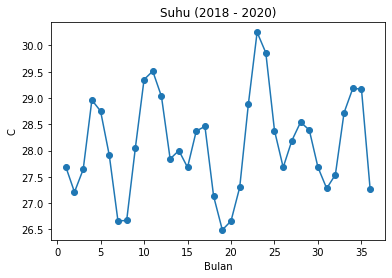

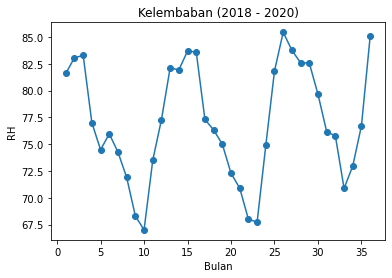

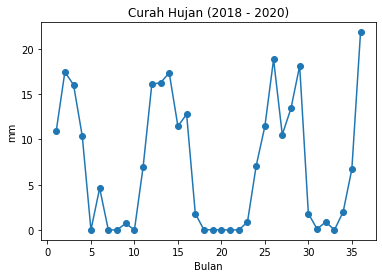

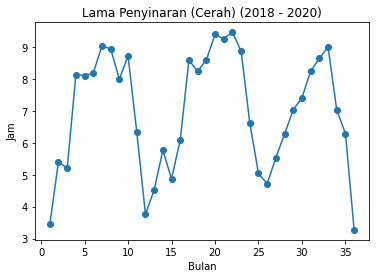

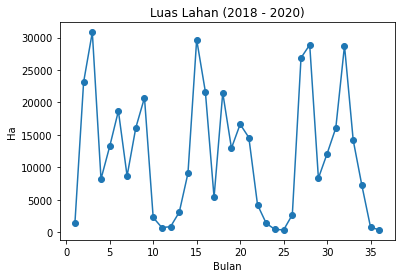

In [5]:
# Grafik dataset

# Grafik garis dari Suhu
plt.plot(number_of_input,input_suhu_ratarata,marker='o')
plt.title('Suhu (2018 - 2020)')
plt.ylabel('C')
plt.xlabel('Bulan')
plt.show()

# Grafik garis dari Kelembaban
plt.plot(number_of_input,input_kelembaban_ratarata,marker='o')
plt.title('Kelembaban (2018 - 2020)')
plt.ylabel('RH')
plt.xlabel('Bulan')
plt.show()

# Grafik garis dari Curah Hujan
plt.plot(number_of_input,input_curah_hujan,marker='o')
plt.title('Curah Hujan (2018 - 2020)')
plt.ylabel('mm')
plt.xlabel('Bulan')
plt.show()

# Grafik garis dari Lama Penyinaran
plt.plot(number_of_input,input_lama_penyinaran,marker='o')
plt.title('Lama Penyinaran (Cerah) (2018 - 2020)')
plt.ylabel('Jam')
plt.xlabel('Bulan')
plt.show()

# Grafik garis dari Luas Lahan
plt.plot(number_of_input,input_luas_lahan,marker='o')
plt.title('Luas Lahan (2018 - 2020)')
plt.ylabel('Ha')
plt.xlabel('Bulan')
plt.show()

In [7]:
# Output data
output_total_produksi_panen = []
number_of_output = []
number=1

# Baca file.csv
with open('/content/Database - Jawa Timur.csv') as csv_file:
  csv_reader = csv.reader(csv_file, delimiter=',')
  next(csv_reader)
  for row in csv_reader:
    number_of_output.append(number)
    output_total_produksi_panen.append(float(row[10]))
    number+=1

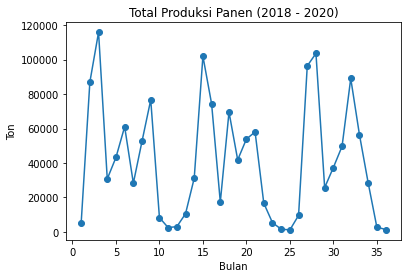

In [8]:
# Grafik data

# Grafik garis dari total produksi beras
plt.plot(number_of_output,output_total_produksi_panen,marker='o')
plt.title('Total Produksi Panen (2018 - 2020)')
plt.ylabel('Ton')
plt.xlabel('Bulan')
plt.show()

# **Data Prepocessing**

In [3]:
# Input dari data pada database
input = []
counter=0

# Baca file.csv
with open(uploaded) as csv_file:
  csv_reader = csv.reader(csv_file, delimiter=',')
  next(csv_reader)
  for row in csv_reader:
    input.append([])
    input[counter].append(float(row[1]))
    input[counter].append(float(row[2]))
    input[counter].append(float(row[3]))
    input[counter].append(float(row[4]))
    input[counter].append(float(row[5]))
    input[counter].append(float(row[6]))
    input[counter].append(float(row[7]))
    input[counter].append(float(row[8]))
    input[counter].append(float(row[9]))
    input[counter].append(float(row[10]))
    input[counter].append(float(row[11]))
    input[counter].append(float(row[12]))
    input[counter].append(float(row[13]))
    input[counter].append(float(row[14]))
    counter+=1

input = np.array(input)

print(input)

[[2.7690e+01 2.7210e+01 2.7640e+01 2.8960e+01 8.1610e+01 8.3070e+01
  8.3290e+01 7.7000e+01 1.0880e+01 1.7450e+01 1.6030e+01 1.0370e+01
  8.1400e+00 8.1840e+03]
 [2.7210e+01 2.7640e+01 2.8960e+01 2.8750e+01 8.3070e+01 8.3290e+01
  7.7000e+01 7.4480e+01 1.7450e+01 1.6030e+01 1.0370e+01 0.0000e+00
  8.1100e+00 1.3213e+04]
 [2.7640e+01 2.8960e+01 2.8750e+01 2.7910e+01 8.3290e+01 7.7000e+01
  7.4480e+01 7.5970e+01 1.6030e+01 1.0370e+01 0.0000e+00 4.6100e+00
  8.1900e+00 1.8685e+04]
 [2.8960e+01 2.8750e+01 2.7910e+01 2.6660e+01 7.7000e+01 7.4480e+01
  7.5970e+01 7.4260e+01 1.0370e+01 0.0000e+00 4.6100e+00 0.0000e+00
  9.0400e+00 8.6520e+03]
 [2.8750e+01 2.7910e+01 2.6660e+01 2.6670e+01 7.4480e+01 7.5970e+01
  7.4260e+01 7.1900e+01 0.0000e+00 4.6100e+00 0.0000e+00 0.0000e+00
  8.9500e+00 1.6081e+04]
 [2.7910e+01 2.6660e+01 2.6670e+01 2.8050e+01 7.5970e+01 7.4260e+01
  7.1900e+01 6.8300e+01 4.6100e+00 0.0000e+00 0.0000e+00 7.2000e-01
  8.0000e+00 2.0726e+04]
 [2.6660e+01 2.6670e+01 2.8050e+01

In [4]:
# Output dari data pada database
output = []
counter=0

# Baca file.csv
with open(uploaded) as csv_file:
  csv_reader = csv.reader(csv_file, delimiter=',')
  next(csv_reader)
  for row in csv_reader:
    output.append([])
    output[counter].append(float(row[15]))
    counter+=1

output = np.array(output)

print(output)

[[ 30774.59]
 [ 43242.82]
 [ 61068.1 ]
 [ 28292.76]
 [ 52681.05]
 [ 76667.7 ]
 [  8336.23]
 [  2551.31]
 [  3091.78]
 [ 10558.09]
 [ 31180.56]
 [101956.71]
 [ 74319.36]
 [ 17322.18]
 [ 69561.05]
 [ 41828.82]
 [ 53880.42]
 [ 58044.09]
 [ 16713.73]
 [  5373.29]
 [  1637.76]
 [  1194.46]
 [  9610.85]
 [ 96343.8 ]
 [103583.39]
 [ 25728.34]
 [ 37383.78]
 [ 49665.76]
 [ 89056.54]
 [ 56447.88]
 [ 28600.74]
 [  2874.25]
 [  1422.82]]


In [5]:
# Bagi data untuk training, validasi dan testing
split_scaled = 33

input_scaled = input[:split_scaled]
input_test = input[split_scaled:]
output_scaled = output[:split_scaled]
output_test = output[split_scaled:]

print(len(input_scaled))
print(len(input_test))

33
0


In [6]:
# Normalisasi data
split_valid = 21

scaler_input = MinMaxScaler()
scaler_input.fit(input_scaled)
input_train_scaled = scaler_input.transform(input_scaled[:split_valid])
input_valid_scaled = scaler_input.transform(input_scaled[split_valid:])
print(scaler_input.data_min_)
print(scaler_input.data_max_)

# print(input_train_scaled)
# print(input_valid_scaled)

scaler_output = MinMaxScaler()
scaler_output.fit(output_scaled)
output_train_scaled = scaler_output.transform(output_scaled[:split_valid])
output_valid_scaled = scaler_output.transform(output_scaled[split_valid:])
print(scaler_output.data_min_)
print(scaler_output.data_max_)

# print(output_train_scaled)
# print(output_valid_scaled)

[ 26.49  26.49  26.49  26.49  67.    67.    67.    67.     0.     0.
   0.     0.     3.27 333.  ]
[3.0250e+01 3.0250e+01 3.0250e+01 3.0250e+01 8.5450e+01 8.5450e+01
 8.5450e+01 8.5450e+01 1.8840e+01 1.8840e+01 1.8840e+01 2.1840e+01
 9.4700e+00 2.9694e+04]
[1194.46]
[103583.39]


In [14]:
# Callbacks
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae')<0.005):
      print("The MAE score has reached 0.005")
      self.model.stop_training = True

callbacks = myCallback()

In [15]:
# Model machine learning
model = tf.keras.Sequential([
          tf.keras.layers.Dense(units = 100, activation="relu", input_dim=14),
          tf.keras.layers.Dense(units = 10, activation="relu"),
          tf.keras.layers.Dense(units = 1, activation="relu")
        ])

opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt,
              loss="mean_absolute_error",
              metrics=['mae'])

model.summary()

fitting_history = model.fit(input_train_scaled, output_train_scaled, epochs = 500, validation_data=(input_valid_scaled,output_valid_scaled), callbacks=[callbacks])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               1500      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 2,521
Trainable params: 2,521
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
1/1 [==============================] - 1s 798ms/step - loss: 0.3047 - mae: 0.3047 - val_loss: 0.2712 - val_mae: 0.2712
Epoch 2/500
1/1 [==============================] - 0s 25ms/step - loss: 0.1887 - mae: 0.1887 - val_loss: 0.2195 - val_mae: 0.2195
Epoch 3/500
1/1 [==============================] - 0s 23ms/step - loss: 0.1293 - mae: 0.1293 - val_loss: 0.1711 - val_mae: 

<Figure size 432x288 with 0 Axes>

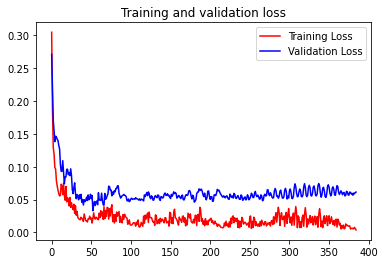

<Figure size 432x288 with 0 Axes>

In [16]:
# Grafik training dan validation loss
training_loss=fitting_history.history['loss']
validation_loss=fitting_history.history['val_loss']
epochs=range(len(training_loss))

plt.plot(epochs, training_loss, 'r', label="Training Loss")
plt.plot(epochs, validation_loss, 'b', label="Validation Loss")
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

In [27]:
# Simpan model
model.save('model-crop.h5')

# **Testing Model**

In [25]:
# Load the model
model = tf.keras.models.load_model('model-crop.h5')

In [17]:
# Input dari data validasi
validation_data=[]
number_of_validation=[]
counter=0
number=1

for x in input_valid_scaled:
  validation_data.append([])
  for y in x:
    validation_data[counter].append(y)
  counter+=1
  number_of_validation.append(number)
  number+=1

total_of_validation=len(input_valid_scaled)
print(total_of_validation)
print(number_of_validation)

12
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


In [18]:
# Output dari data validasi
output_valid_transform=[]
counter=0

for i in output_valid_scaled:
  output_valid_transform.append([])
  for x in i:
    output_valid_transform[counter].append([])
    output_valid_transform[counter][0].append(i[0])
  counter+=1

print(output_valid_transform)

[[[0.0]], [[0.08220019488434932]], [[0.9292932351182888]], [[1.0]], [[0.23961457552100604]], [[0.35344953795297995]], [[0.4734037165931904]], [[0.8581208925613345]], [[0.5396425179948653]], [[0.26766838954172106]], [[0.01640597279412921]], [[0.0022303192347063287]]]


In [22]:
# Prediksi data validasi
output_prediksi=[]
output_validation=[]

for i in range(total_of_validation):
  input_prediksi=[]
  input_prediksi.append([])
  for y in validation_data[i]:
    input_prediksi[0].append(y)
  prediksi = model.predict(input_prediksi)
  prediksi = scaler_output.inverse_transform(prediksi)
  output_prediksi.append(prediksi[0][0])
  valid = scaler_output.inverse_transform(output_valid_transform[i])
  output_validation.append(valid[0][0])

print(output_prediksi)
print(output_validation)

[1194.46, 12105.611, 79488.47, 97064.57, 36334.81, 31652.35, 62590.414, 83878.73, 52215.85, 26919.45, 1194.46, 9076.573]
[1194.46, 9610.85, 96343.8, 103583.38999999998, 25728.34, 37383.78, 49665.76, 89056.54, 56447.88, 28600.740000000005, 2874.2500000000005, 1422.82]


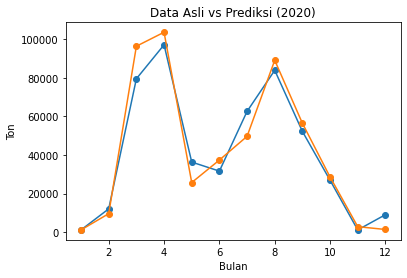

In [23]:
# Grafik garis dari total produksi panen

plt.plot(number_of_validation,output_prediksi,marker='o')
plt.plot(number_of_validation,output_validation,marker='o')
plt.title('Data Asli vs Prediksi (2020)')
plt.ylabel('Ton')
plt.xlabel('Bulan')
plt.show()